In [25]:
!wget https://archive.ics.uci.edu/static/public/713/auction+verification.zip

--2024-02-22 07:24:29--  https://archive.ics.uci.edu/static/public/713/auction+verification.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘auction+verification.zip.1’

auction+verificatio     [ <=>                ]  74.77K  --.-KB/s    in 0.1s    

2024-02-22 07:24:29 (770 KB/s) - ‘auction+verification.zip.1’ saved [76568]



In [26]:
!unzip auction+verification.zip

Archive:  auction+verification.zip
replace data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


## 1. Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных для моделирования исхода аукицона - https://archive.ics.uci.edu/dataset/713/auction+verification.


Цель этого набора - выяснить, можно ли заменить дорогостоящую проверку сложных моделей процессов (здесь: одновременные многораундовые аукционы, используемые для аукциона частотных спектров) предсказаниями результатов.

Датасет состоит из одного файла : data.csv. Который содержит колонки:

* process.b1.capacity	- oбъем (максимальное количество товаров для победы) участника торгов 1.
* process.b2.capacity	- oбъем (максимальное количество товаров для победы) участника торгов 2.
* process.b3.capacity	- oбъем (максимальное количество товаров для победы) участника торгов 3.
* process.b4.capacity	- oбъем (максимальное количество товаров для победы) участника торгов 4.
* property.price	- проверенная на данный момент цена.
* property.product - проверенный на данный момент продукт.
* property.winner	- участник торгов, подтвержденный в настоящее время как победитель (0, если проверена только цена).
* verification.result	- результат бинарной проверки (возможен ли проверенный результат).
* verification.time - время выполнения процедуры проверки.



### Импорт библиотек

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

In [28]:
df = pd.read_csv('data.csv', sep = ',')

## 2. Основные характеристики датасета

In [29]:
df.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.316667
1,0,0,2,1,59,2,0,False,200.860000
2,0,0,2,1,59,4,0,False,154.888889
3,0,0,2,1,59,6,0,False,108.640000
4,0,0,2,1,60,1,0,True,85.466667


In [32]:
df.shape

(2043, 9)

In [33]:
df.columns

Index(['process.b1.capacity', 'process.b2.capacity', 'process.b3.capacity',
       'process.b4.capacity', 'property.price', 'property.product',
       'property.winner', 'verification.result', 'verification.time'],
      dtype='object')

In [34]:
df.dtypes

process.b1.capacity      int64
process.b2.capacity      int64
process.b3.capacity      int64
process.b4.capacity      int64
property.price           int64
property.product         int64
property.winner          int64
verification.result       bool
verification.time      float64
dtype: object

In [35]:
df.describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000,2043.000000
mean,1.000000,2.093979,1.883994,0.587861,71.473324,3.252080,0.455213,7336.944574
std,0.816696,0.811269,0.320310,0.492340,8.048740,1.804225,1.062828,10375.393650
min,0.000000,0.000000,1.000000,0.000000,59.000000,1.000000,0.000000,77.916667
25%,0.000000,1.000000,2.000000,0.000000,65.000000,2.000000,0.000000,546.818910
50%,1.000000,2.000000,2.000000,1.000000,70.000000,3.000000,0.000000,1316.983333
75%,2.000000,3.000000,2.000000,1.000000,78.000000,5.000000,0.000000,10876.638889
max,2.000000,3.000000,2.000000,1.000000,90.000000,6.000000,4.000000,44130.520833


## 3. Визуальное исследование датасета

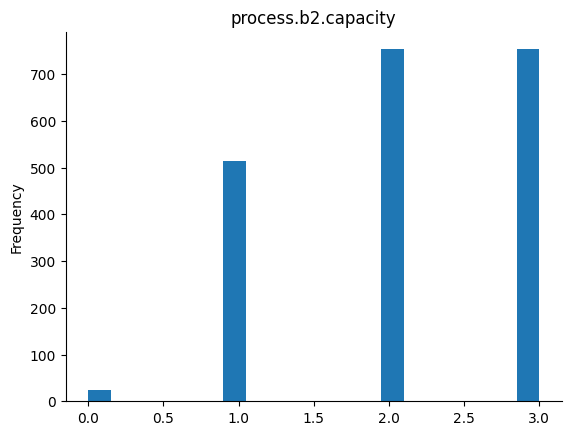

In [36]:
from matplotlib import pyplot as plt
df['process.b2.capacity'].plot(kind='hist', bins=20, title='process.b2.capacity')
plt.gca().spines[['top', 'right',]].set_visible(False)

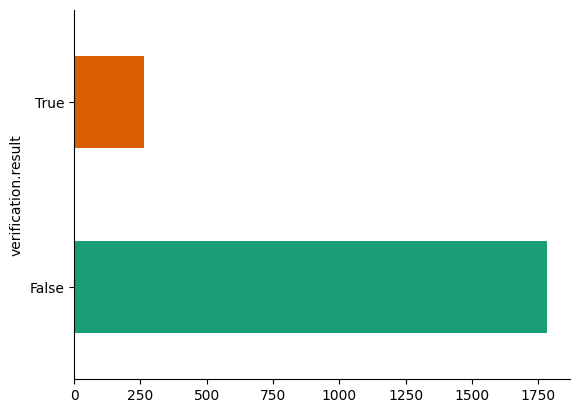

In [37]:
df.groupby('verification.result').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='property.price'>

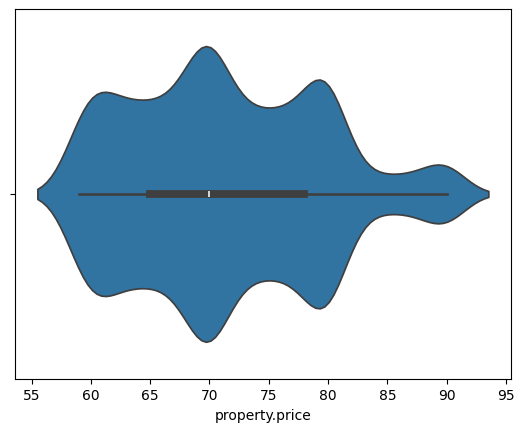

In [38]:
sns.violinplot(x=df['property.price'])

## 4. Информация о корреляции признаков

In [39]:
df.corr()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
process.b1.capacity,1.000000,0.084260,0.443671,-0.052370,0.285558,0.068131,-0.121864,-0.120126,0.398359
process.b2.capacity,0.084260,1.000000,-0.025869,-0.069726,0.035033,-0.099167,-0.049640,-0.044442,0.042732
process.b3.capacity,0.443671,-0.025869,1.000000,-0.079735,0.189417,-0.022250,-0.096544,-0.071344,0.240032
process.b4.capacity,-0.052370,-0.069726,-0.079735,1.000000,0.098808,0.118117,0.105088,0.008864,0.044963
property.price,0.285558,0.035033,0.189417,0.098808,1.000000,-0.019990,0.222108,0.211760,0.078056
property.product,0.068131,-0.099167,-0.022250,0.118117,-0.019990,1.000000,0.066033,0.036485,-0.416841
property.winner,-0.121864,-0.049640,-0.096544,0.105088,0.222108,0.066033,1.000000,0.214558,-0.104274
verification.result,-0.120126,-0.044442,-0.071344,0.008864,0.211760,0.036485,0.214558,1.000000,-0.232090
verification.time,0.398359,0.042732,0.240032,0.044963,0.078056,-0.416841,-0.104274,-0.232090,1.000000


<Axes: >

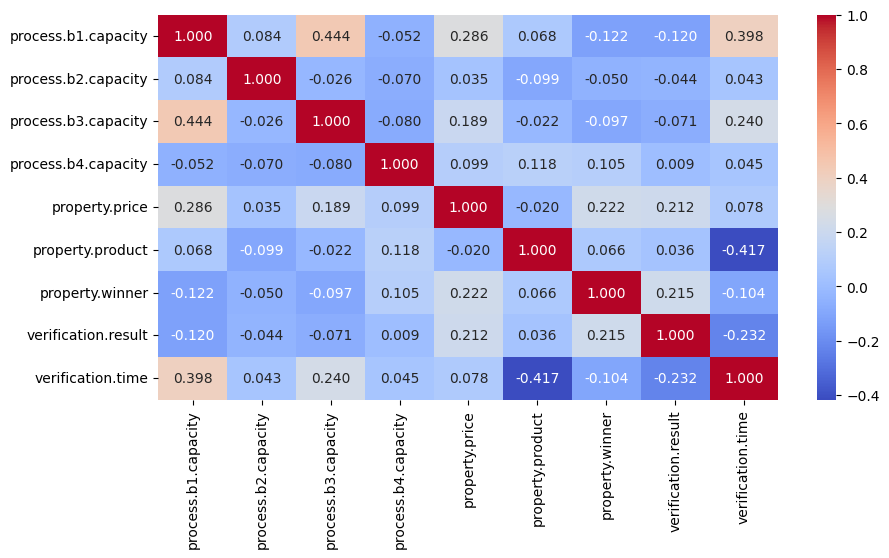

In [50]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
sns.heatmap(df.corr(),annot=True, fmt='.3f', cmap= 'coolwarm')